In [20]:
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq
import pandas as pd

SAMPLING_RATE = 64 #Hz
WINDOW_SIZE = 10
LOW_FREQ = 0.5 #Hz
HIGH_FREQ = 5 #Hz

In [21]:
def bandpass_filter(signal_data: np.ndarray, low_freq: float, high_freq: float, sampling_rate:int) -> np.ndarray: 
    """
    Filter frequencies out of [low_freq, high_freq].
        args:
            signal_data: 
                data in time domain
            low_freq:
                low frequency
            high_freq:
                high frequency
            sampling_rate:
                sampling rate
    """
    nyquist_freq = 0.5 * sampling_rate
    low = low_freq / nyquist_freq
    high = high_freq / nyquist_freq
    order = 4  # Filter order
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal_data)
    return filtered_signal

In [37]:
def get_hr_from_bvp(bvp: np.ndarray) -> float:
    import matplotlib.pyplot as plt
    # plt.plot(bvp)
    filtered_bvp_signal = bandpass_filter(bvp, LOW_FREQ, HIGH_FREQ, sampling_rate=SAMPLING_RATE)
    # n = len(filtered_bvp_signal)
    # frequencies = fftfreq(n, 1/SAMPLING_RATE)
    # fft_values = abs(fft(filtered_bvp_signal))
    # frequencies = frequencies[:len(frequencies)//2]
    # fft_values = fft_values[:len(fft_values)//2]
    # fft_values /= sum(fft_values)
    # hr_in_hz = fft_values@frequencies
    # hr_bpm = 60*hr_in_hz
    # return hr_bpm
    from scipy.signal import correlate, find_peaks
    r = correlate(filtered_bvp_signal, filtered_bvp_signal)
    r = r[len(r)//2:]
    peaks,_ = find_peaks(r, prominence=r[0]/4)
    # plt.plot(r)
    # plt.scatter(peaks, r[peaks], color='r')
    # plt.show()
    return 60/((peaks[1]-peaks[0])/64)

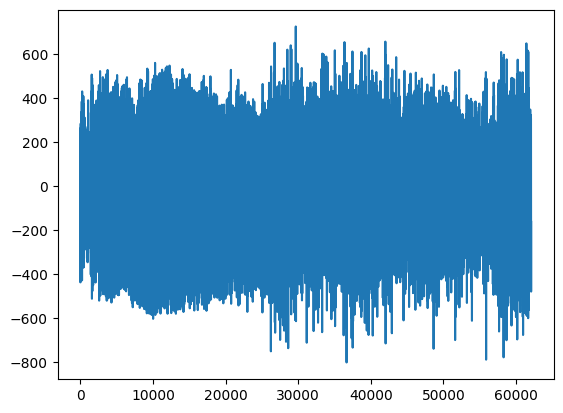

In [38]:
# SAMPLING_RATE = 64 #Hz
# df = pd.read_csv('./../../recordings/empatica/itai_15min_run_metronome//BVP.csv', skiprows=2, header=None)
# bvp = df[0].values
# bvp = np.array(bvp)
# bvp = bvp[1000:2200]
# bvp = bvp[: len(bvp) - len(bvp) % SAMPLING_RATE]
# plt.plot(bvp)
bvp = np.load('./../../recordings/empatica/itai_15min_run_metronome/bvp.pkl', allow_pickle=True)
plt.plot(bvp)

window[0] | HR=[137.14285714285714]
window[1] | HR=[142.22222222222223]
window[2] | HR=[142.22222222222223]
window[3] | HR=[137.14285714285714]
window[4] | HR=[137.14285714285714]
window[5] | HR=[137.14285714285714]
window[6] | HR=[137.14285714285714]
window[7] | HR=[71.11111111111111]
window[8] | HR=[142.22222222222223]
window[9] | HR=[142.22222222222223]


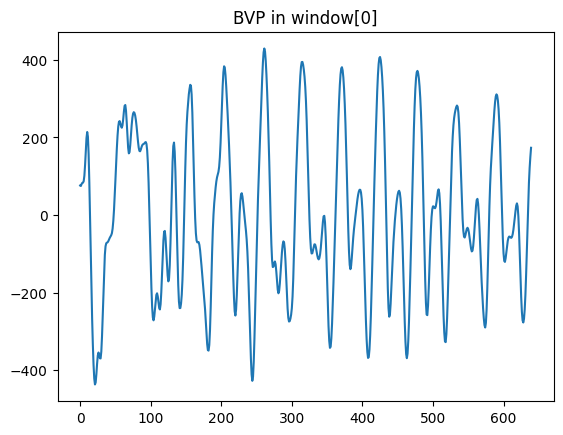

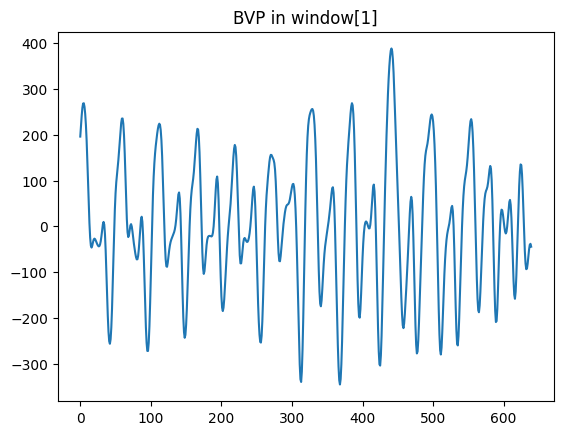

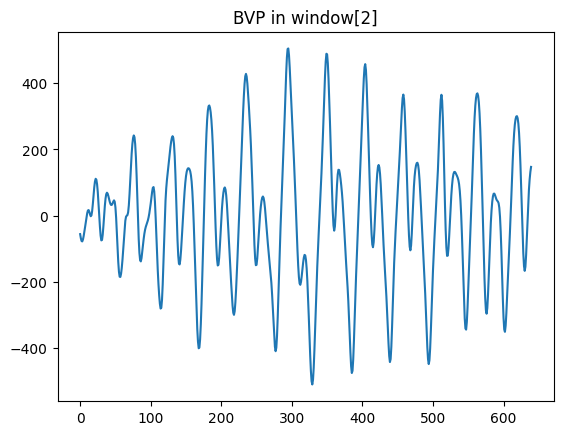

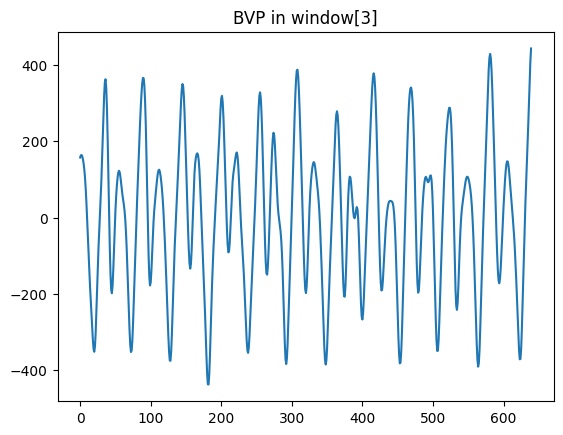

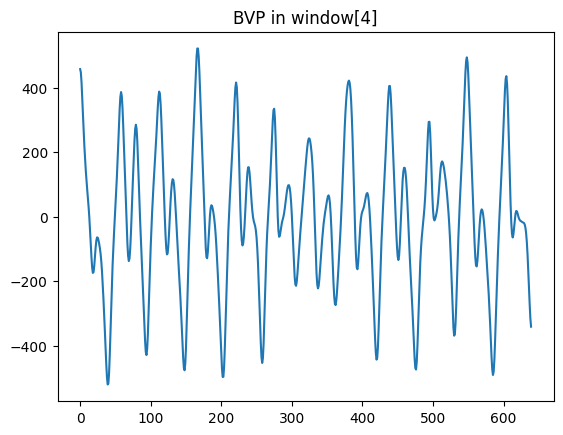

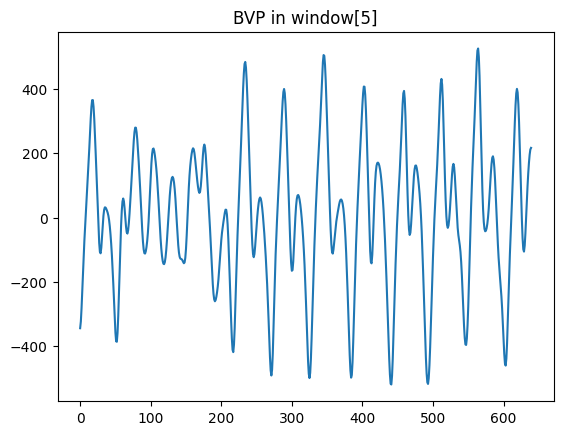

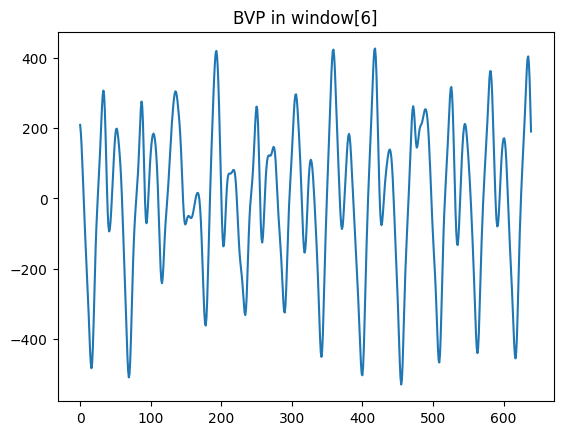

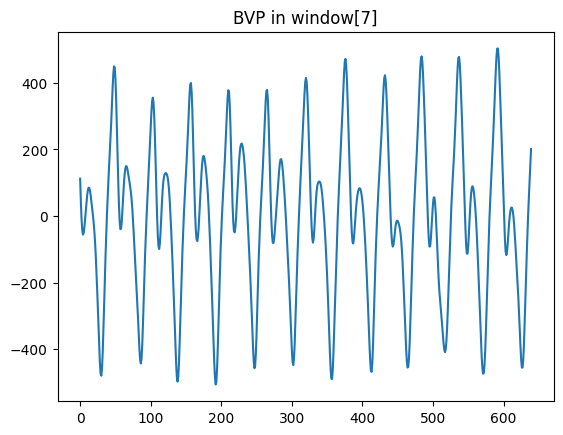

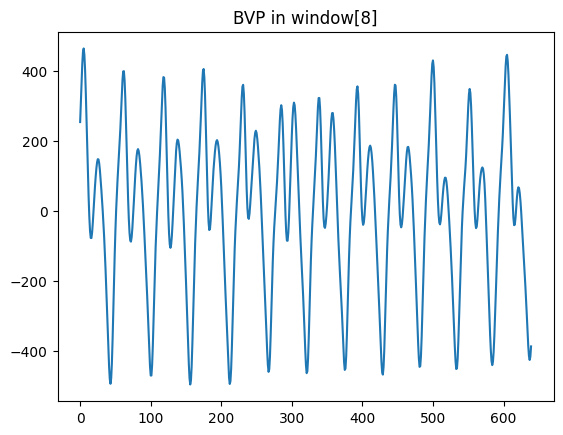

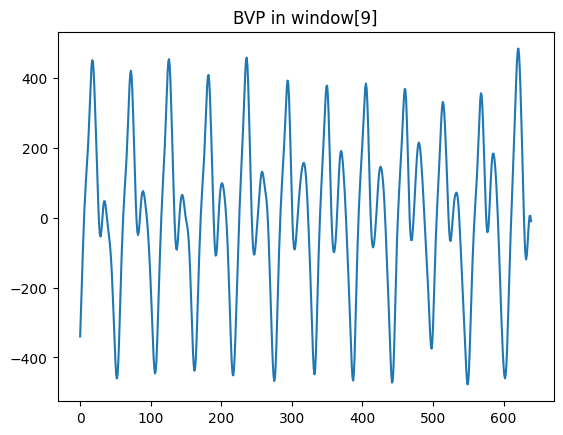

In [42]:
# reshape bvp signal to non overllaping windows 10 sec length
bvp_cutted = bvp[:len(bvp)- len(bvp)%SAMPLING_RATE]
bvp_reshaped = bvp_cutted.reshape(len(bvp)//(WINDOW_SIZE*SAMPLING_RATE), WINDOW_SIZE*SAMPLING_RATE)

# print 10 bvp windows, in each windows we estimate the HR
for i in range(10):
    plt.figure()
    plt.plot(bvp_reshaped[i])
    plt.title(f'BVP in window[{i}]')
    print(f"window[{i}] | HR=[{get_hr_from_bvp(bvp_reshaped[i]/2)}]")

In [76]:
LOW_FREQ = 0.1 #Hz
HIGH_FREQ = 5 #Hz

def get_hr_from_bvp(bvp: np.ndarray) -> float:
    import matplotlib.pyplot as plt
    # filted unrelevant frequencies
    filtered_bvp_signal = bandpass_filter(bvp, LOW_FREQ, HIGH_FREQ, sampling_rate=SAMPLING_RATE)

    from scipy.signal import correlate, find_peaks
    r = correlate(filtered_bvp_signal, filtered_bvp_signal)
    plt.plot(r)
    # plt.scatter(peaks, r[peaks], color='r')
    plt.show()
    r = r[len(r)//2:]
    peaks,_ = find_peaks(r, prominence=r[0]/4)
    return 60/((peaks[1]-peaks[0])/64)

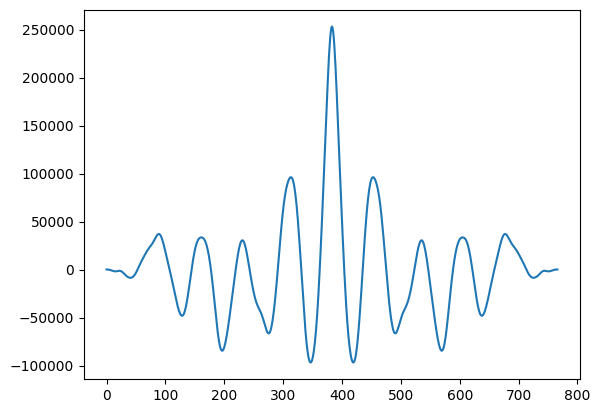

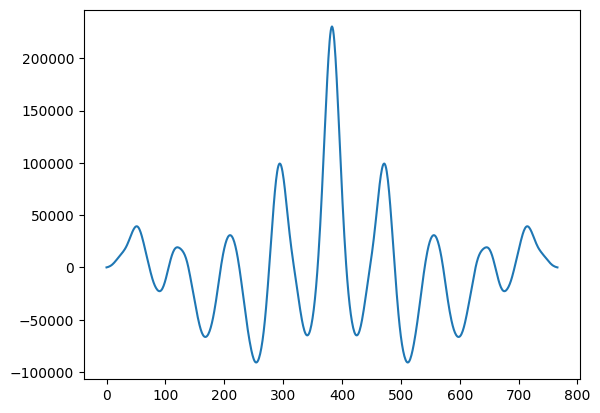

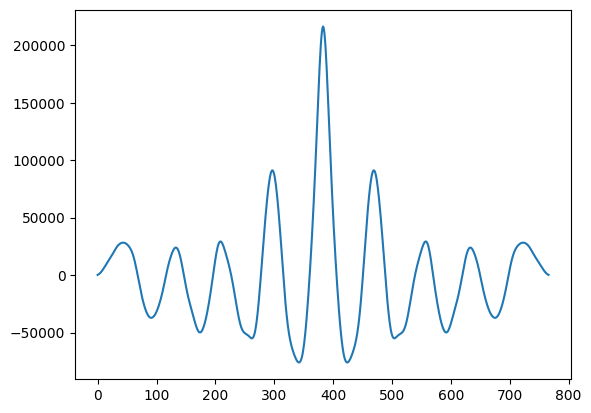

[46.829268292682926, 45.714285714285715, 43.63636363636363]


In [78]:
# reshape bvp to 3 non-overlapping windows 6 seconds each
bvp_win = bvp.reshape((3 ,len(bvp)//3))
hr = [get_hr_from_bvp(bvp_win[i]) for i in range(3)]
print(hr)